# Funciones de Densidad de probalidad

Hay 3 tipos:
- Función de Densidad de Probabilidad(FDP): Se utiliza para la descripción de datos continous y su objetivo es calcular densidades, que son probabilidades relativas de intervalos de valores.
- Función de Masa de Probabilidad(PMF): Es la euivalente a la PDF pero para datos discretos de una variable aleatoria.
- Funcion distributiva Acumulatica(CDF): Se utiliza en datos discretos tanto continous, nos ofrece una distrbución general.

**Valores continuos:** son infinitos, pueden tomar cualquier valor dentro de un rango. Ejemplo: temperatura tiempo velocidad

**Valores Discretos:** representan cantidades especificas, solo pueden ser números enteros o contrar elementos

<hr>

## 1. FDP (distribución Normal estándar-> media=0 ; desviación estándar=1)

Trabaja solo en variables continuas, predice probabilidades de intervalos de valor.
Las distruciones normales siempre son simétricas.
Tiene forma de campana o Gaussina.

Las diferencias en la forma de la campana dependen de los valores de la media y de la desviación estándar.
- Una media mas alta o baja, desplazará la campana hacia la derecha o izquierda
- una desviacion estándar más alta o baja hará que la campana sea más ancha o estrecha 

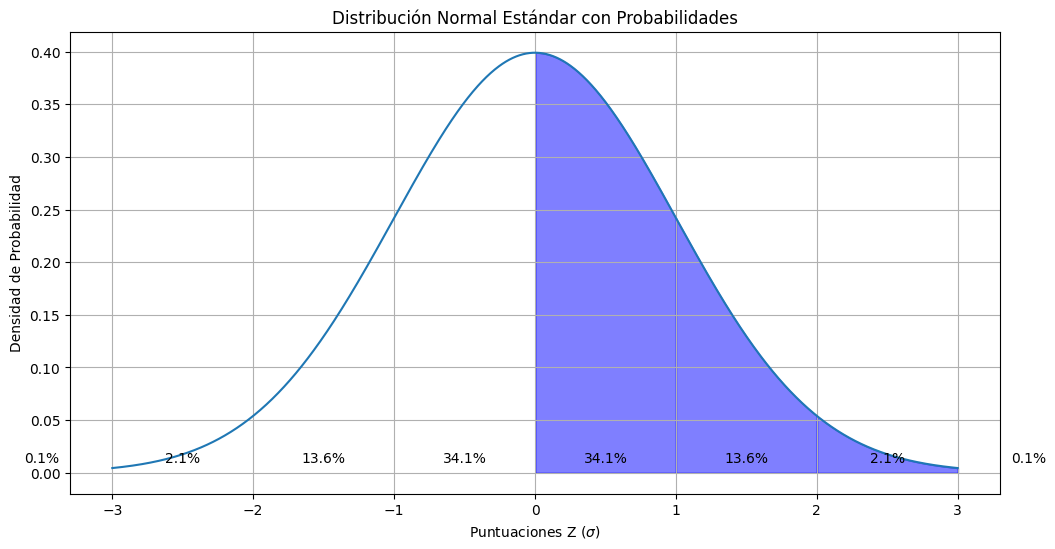

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Create a range of x values
x = np.linspace(-3, 3, 1000)

# Create the y values based on the probability density function
y = stats.norm.pdf(x, 0, 1)

# Plotting the standard normal distribution
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Normal Distribution ($\\mu=0$, $\\sigma=1$)')

# Annotating important percentages and regions
percentage_labels = [
    (0.1, -3, -4),
    (2.1, -2, -3),
    (13.6, -1, -2),
    (34.1, 0, -1),
    (34.1, 0, 1),
    (13.6, 1, 2),
    (2.1, 2, 3),
    (0.1, 3, 4)
]

for percentage, start, end in percentage_labels:
    plt.fill_between(x, y, where=(x >= start) & (x <= end), color='blue', alpha=0.5)
    plt.text((start + end) / 2, 0.01, f'{percentage}%', horizontalalignment='center')

# Label the axes and the plot
plt.title('Distribución Normal Estándar con Probabilidades')
plt.xlabel('Puntuaciones Z ($\\sigma$)')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True)
plt.show()

P(μ<X<μ+σ(sigma))~=0.341 P -> es la probabilidad. Entonces:
- P(0<X<0+1) ~= 0.341
- P(3<X<3+2) ~= 0.341

Para obtener el valor de 0.341, hay que calcular el área bajo la curva de la función.

**Probabilidad de que un valor aleatorio "X" se encuentre en el intervalor de "a/b"**

![FuncionDensidad](https://www.matematicasonline.es/BachilleratoCCSS/segundo/archivos/distribucion_normal/t21_di7.gif)

![FuncionDensidad](https://www.matematicasonline.es/BachilleratoCCSS/segundo/archivos/distribucion_normal/t21_di2.gif)

![FuncionDistribucionNormal](https://www.matematicasonline.es/BachilleratoCCSS/segundo/archivos/distribucion_normal/t21_di4.gif)

### 1.1 Distribucion no estandar

Z = (X-μ)/σ

Entonces para la mu=3 y desviacion estandar=2

valores dados: 3,1 y 5

Transformación Z:
- Z = (3-3)/2 = 0
- Z = (1-3)/2 = -1
- Z = (5-3)/2 = 1

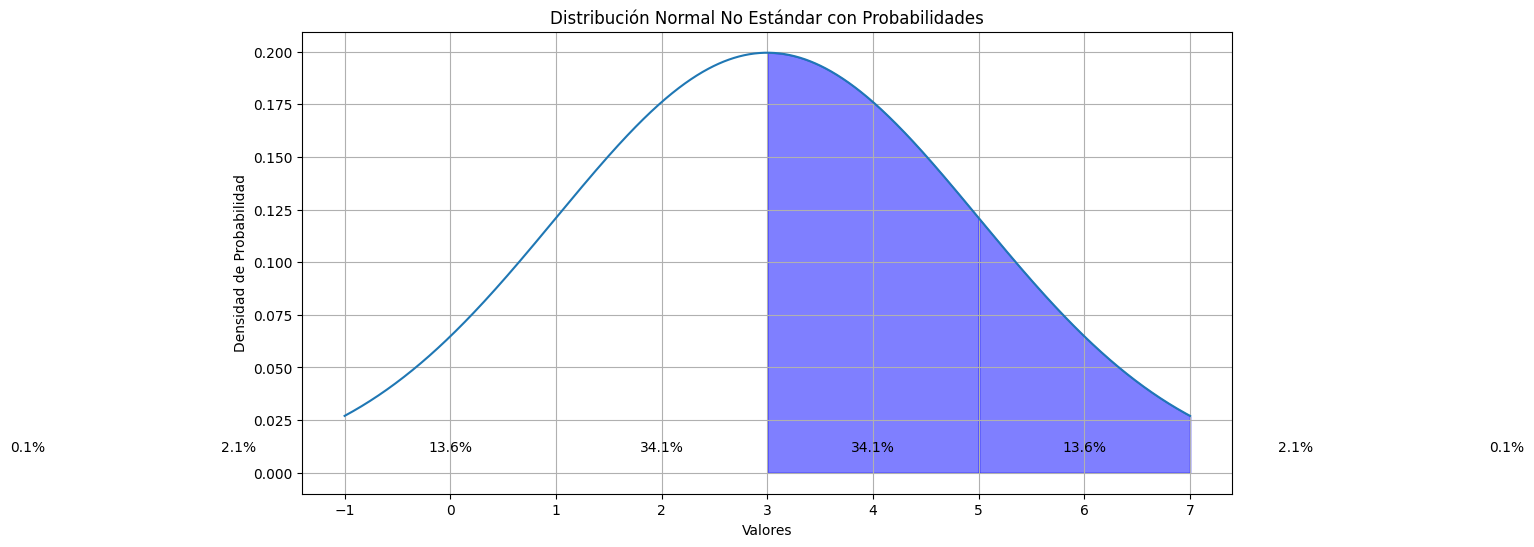

In [11]:
# Define the new mean and standard deviation
new_mu = 3
new_sigma = 2

# Create a range of x values
x_new = np.linspace(-1, 7, 1000)

# Create the y values based on the new probability density function
y_new = stats.norm.pdf(x_new, new_mu, new_sigma)

# Plotting the non-standard normal distribution
plt.figure(figsize=(12, 6))
plt.plot(x_new, y_new, label=f'Distribución Normal ($\\mu={new_mu}$, $\\sigma={new_sigma}$)')

# Annotating important percentages and regions for the new distribution
for percentage, start, end in percentage_labels:
    plt.fill_between(x_new, y_new, where=(x_new >= new_mu + start * new_sigma) & (x_new <= new_mu + end * new_sigma), color='blue', alpha=0.5)
    plt.text(new_mu + (start + end) * new_sigma / 2, 0.01, f'{percentage}%', horizontalalignment='center')

# Label the axes and the plot in Spanish
plt.title('Distribución Normal No Estándar con Probabilidades')
plt.xlabel('Valores')
plt.ylabel('Densidad de Probabilidad')
plt.grid(True)
plt.show()


In [9]:
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad #metodo de integracion numerica

# Función que integra la PDF
def probabilidad_intervalo(a, b, media, desviacion_estandar):
    # Función que queremos integrar
    f = lambda x: norm.pdf(x, loc=media, scale=desviacion_estandar)
    # Integración
    #Devuelve una tupla con dos valores: La integracion(probabilidad) y una estimación de error.
    #sólo necesitaremos el primer valor.
    result, _ = quad(f, a, b) 
    return result

# Valores
media_estandar = 0
desviacion_estandar_estandar = 1
media_no_estandar = 3
desviacion_estandar_no_estandar = 2

# Probabilidades para la distribución estándar
p1_estandar = probabilidad_intervalo(-1, 1, media_estandar, desviacion_estandar_estandar)

# Probabilidades para la distribución no estándar
p1_no_estandar = probabilidad_intervalo(1, 5, media_no_estandar, desviacion_estandar_no_estandar)

print("Distribución Estándar (media 0, desviación estándar 1):")
print(f"P(-1 <= X <= 1) = {p1_estandar:.4f}")

print("\nDistribución No Estándar (media 3, desviación estándar 2):")
print(f"P(1 <= X <= 5) = {p1_no_estandar:.4f}")

Distribución Estándar (media 0, desviación estándar 1):
P(-1 <= X <= 1) = 0.6827

Distribución No Estándar (media 3, desviación estándar 2):
P(1 <= X <= 5) = 0.6827
